##### 1. โหลดข้อมูลจากไฟล์ salary_food.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Read data
df = pd.read_csv('datasets/salary_food.csv')

df

,income,food_expenses
0,16,52
1,20,60
2,12,50
3,14,52
4,14,50
5,15,48
6,12,48
7,10,46
8,10,48
9,12,50


##### 2. ตรวจสอบการกระจายของข้อมูลด้วยแผนภาพ Scatter Plot

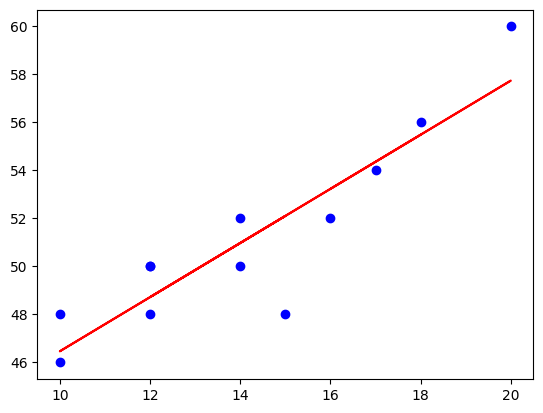

In [5]:
# scatterplot
# plt.plot(df['income'], df['food_expenses'], '.', color='blue')
plt.scatter(df['income'], df['food_expenses'], color='blue')

# หาความชัน (slop)
m, b = np.polyfit(df['income'], df['food_expenses'], 1)

# สร้างเส้นตรง linear regression line
plt.plot(df['income'], m * df['income'] + b, '-', color='red')

# show the plot
plt.show()

##### 3.แบ่งข้อมูลสำหรับสอน (Train) และทดสอบ (Test)

In [17]:
# x, y for simple regression
x = df[['income']]
y = df[['food_expenses']]

# Split the data into training/testing sets
x_train = x[:10].values
y_train = y[:10].values

x_test = x[-2:].values
y_test = y[-2:].values

# print(x_train)
# print(y_train)
print(x_test)
print(y_test)

[[17]
 [18]]
[[54]
 [56]]


#### 4.สอน Model (Training Model)

In [16]:
# create model object linear regression
model = LinearRegression()

# train the model with the data
model.fit(x_train, y_train)

LinearRegression()

#### 5.การทำนายผลจาก Regression Model (Predicting)

In [20]:
# ตัวอย่างการทำนายผล
print("Predict: ", model.predict(x_test))

Predict:  [[54.3030303 ]
 [55.41818182]]


##### 6. การประเมินผลโมเดล (Model Evaluation)

In [22]:
# ดูค่า coefficient และ intercept
print('Coefficient:', model.coef_) # ค่า coefficient
print('Intercept:', model.intercept_) # ค่า intercept หรือค่าที่ตัดแกน y

# ดูค่าความแม่นยำของโมเดล โดยใช้ค่า R-squared
print('R-squared score:', model.score(x_test, y_test)) # R-Square ของการทำนาย มีค่าตั้งแต่ 0.1 - 1 (x100) ค่าที่ใกล้ 1 คือ การทำนายที่ดี
print("ความแม่นยำ %.2f%%" % (model.score(x_test, y_test) * 100))

Coefficient: [[1.11515152]]
Intercept: [35.34545455]
R-squared score: 0.7848301193755732
ความแม่นยำ 78.48%


#### 7.การวาดกราฟแสดงผลลัพธ์ของโมเดล

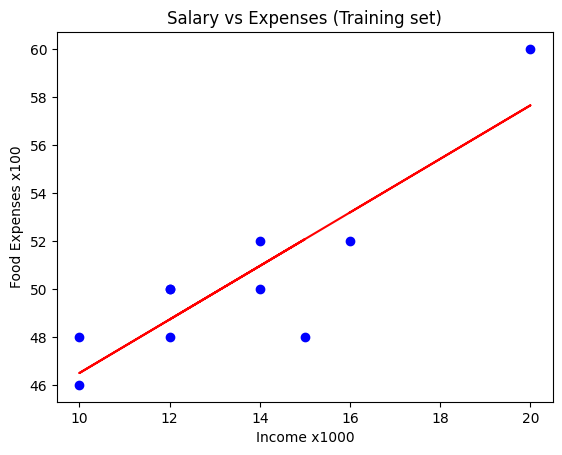

In [23]:
# plotting the training set
plt.scatter(x_train, y_train, color = 'blue')

# plotting the predicted values
plt.plot(x_train, model.predict(x_train), color = 'red')

# adding labels
plt.title('Salary vs Expenses (Training set)')
plt.xlabel('Income x1000')
plt.ylabel('Food Expenses x100')

# displaying the graph
plt.show()

##### 8. บันทึกโมเดล และนำไปใช้งาน Model export

In [ ]:
# ตรวจสอบว่ามี library joblib หรือยัง
!pip show joblib

In [25]:
# เรียกใช้งาน joblib
from joblib import dump

# บันทึกโมเดล
dump(model, 'salary_food_model.joblib')

['salary_food_model.joblib']

['salary_food_model.joblib']

#### 9. โหลดโมเดลที่บันทึกไว้มาใช้งาน load model

In [2]:
# เรียกใช้งาน joblib
from joblib import load

# โหลดไฟล์ที่เก็บโมเดล
myModel = load('../MyModelTrained/salary_food_model.joblib')

# ทดสอบโมเดล โดยให้เงินเดือนเท่ากับ 23000 บาท และ 35000 บาท
myModel.predict([[8],[23],[35]])

array([[44.26666667],
       [60.99393939],
       [74.37575758]])